# 5. Modelos de Regressão

## 5.1 Regressão Linear

In [1]:
import numpy as np
import pandas as pd

In [2]:
%pwd

'C:\\Users\\sonia.quaresma\\PythonPlayground'

In [3]:
datadir ="datasets\\"
filename = "df_prep.csv"

In [4]:
df_hosp = pd.read_csv(f"{datadir}{filename}", index_col=0, verbose = False, encoding='latin-1')
df_hosp.head()

,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,C21061,...,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001,t_cirurgia
ANO,,,,,,,,,,,,,,,,,,,,,
2012.0,229.0,17.0,1458.0,247.0,159.00,2.0,11.0,0.0,5.0,0.0,...,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,454.0,yes
2012.0,206.0,17.0,144.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,no
2012.0,65.0,16.0,894.0,111.0,38.25,0.0,8.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,yes
2012.0,106.0,17.0,801.0,166.0,108.00,0.0,12.0,0.0,7.0,0.0,...,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,228.0,yes
2012.0,209.0,11.0,221.0,13.0,13.00,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,80.0,yes


In [5]:
df_hosp.describe()

,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,C21061,...,C30001,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,118.081395,14.976744,642.744186,113.872093,73.979651,0.813953,6.941860,0.360465,2.953488,0.302326,...,212.290698,22.941860,3.127907,6.220930,4.476744,3.465116,0.965116,3.465116,1.220930,189.348837
std,68.264230,3.620129,809.928453,172.413511,108.256016,2.144825,10.384779,1.146994,5.346592,1.701693,...,255.792649,26.911775,4.752204,10.678622,5.740930,8.559409,1.482825,4.421066,2.783993,240.396475
min,3.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.500000,11.000000,120.250000,7.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.250000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,119.000000,16.000000,338.500000,42.500000,33.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,102.500000,10.000000,0.000000,0.000000,3.000000,1.000000,0.000000,2.000000,0.000000,85.500000
75%,175.750000,17.000000,872.500000,162.500000,115.500000,0.000000,10.750000,0.000000,3.750000,0.000000,...,321.250000,35.750000,4.000000,11.000000,6.000000,3.000000,1.000000,5.000000,1.000000,282.250000
max,229.000000,30.000000,5325.000000,1161.000000,719.000000,13.000000,51.000000,6.000000,31.000000,13.000000,...,1515.000000,103.000000,21.000000,50.000000,28.000000,72.000000,6.000000,19.000000,15.000000,1515.000000


In [6]:
df_hosp = df_hosp.reset_index()

In [8]:
df_hosp = df_hosp.drop(columns=['t_cirurgia']) 

In [9]:
# criação de matriz de correlação e selecão do triângulo superior
cor_matrix = df_hosp.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [10]:
# seleciona para remover as colunas altamente correlacionadas
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['C20001', 'C21001', 'C21021', 'C21071', 'C21251', 'C21421', 'C21431', 'C23001', 'C24001', 'C30001', 'C32001']


In [11]:
df_hosp = df_hosp.drop(columns=to_drop, axis=1)

In [12]:
# seleciona para remover as colunas ano e ordem
# que não trazem informação e queremos evitar que ruído seja aprendido
to_drop = ['ANO','NORDEM']
df = df_hosp.drop(columns=to_drop, axis=1)

In [13]:
# excluimos os registos com valores vazios
df1 = df.dropna()

In [14]:
# define a variável target e as features
X = df1.drop(columns=['C31011']) 
y = df1['C31011'].values

In [15]:
## Typecast da coluna para categoria em pandas
X['NUTS2'] = pd.Categorical(X.NUTS2)
X.dtypes[0:3]

NUTS2     category
C10001     float64
C21011     float64
dtype: object

In [16]:
X.shape

(86, 48)

In [17]:
# cria variáveis dummy e faz drop da baseline
X = pd.get_dummies(X, drop_first = True)

In [18]:
# O nº de colunas aumentou por causa das dummy variables
X.shape

(86, 53)

In [19]:
from sklearn.model_selection import train_test_split 

#Split data for machine learning
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2 ,random_state = 2002)
print(X_train.shape)
print(X_test.shape)

(68, 53)
(18, 53)


In [20]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

1.0

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


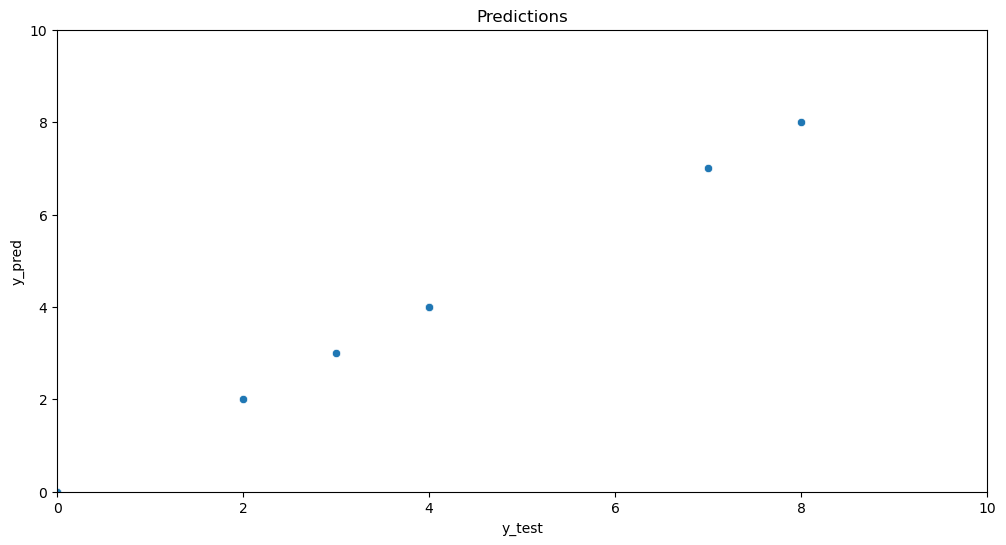

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5.2 Regressão Logistica

### 5.2.1 Regressão Logistica para prever um valor

In [24]:
from sklearn.linear_model import LogisticRegression

# sem qualquer parâmetro
logisticRegr = LogisticRegression()

In [25]:
logisticRegr.fit(X_train, y_train)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = logisticRegr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.05939731754049826

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


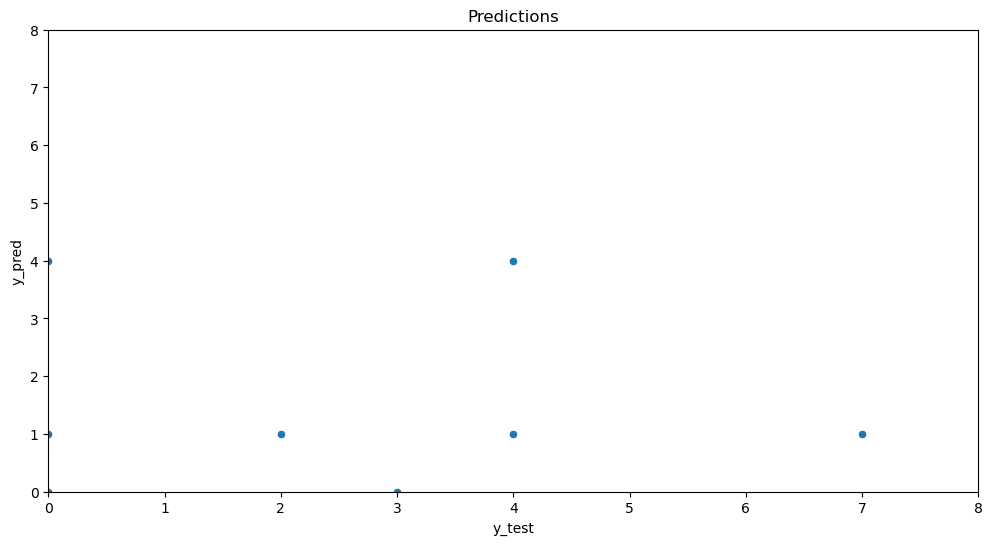

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred)
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 5.2.2 Regressão Logistica para classificar

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()

In [30]:
# Vamos ver que há 1797 images (imagens 8 por 8 com uma dimensionalidade de 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


#### Vamos visualizar algumas imagens

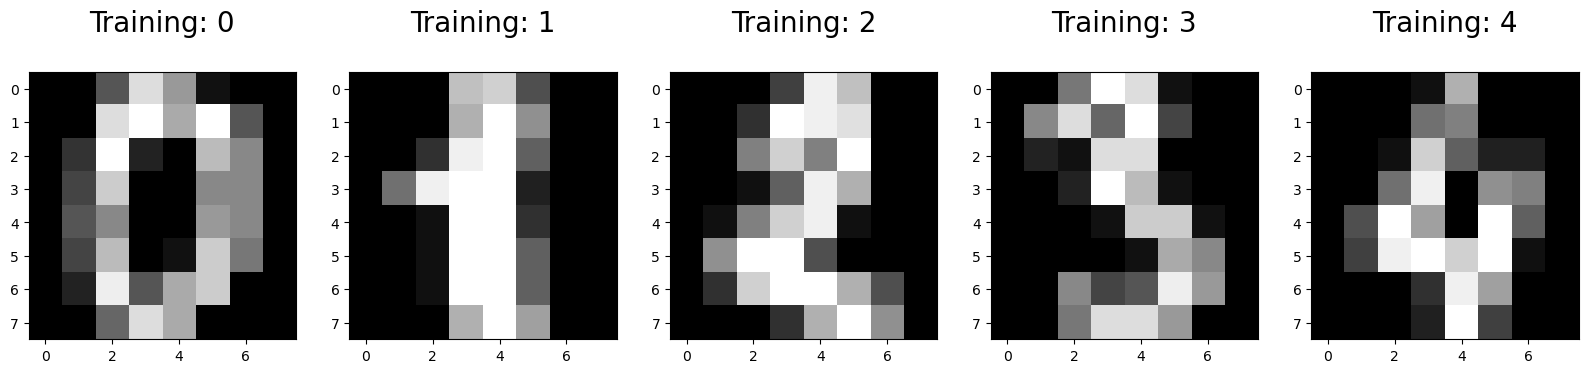

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 # imshow() função dó módulo pyplot module do matplotlib para mostrar dados como imagem; i.e. num raster 2D.
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=2023)

In [33]:
from sklearn.linear_model import LogisticRegression

# sem qualquer parâmetro
logisticRegr = LogisticRegression()

In [34]:
logisticRegr.fit(X_train, y_train)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Retorna um Array NumPy 
# Prevê para um único caso (imagem)
prv1 = logisticRegr.predict(X_test[0].reshape(1,-1))
prv1

array([5])

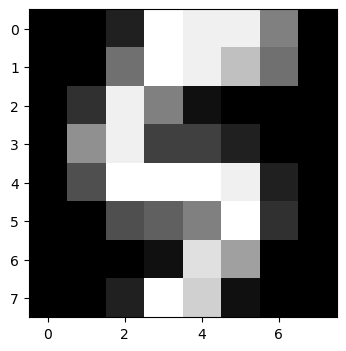

In [36]:
# vamos ver a imagem
plt.figure(figsize=(20,4))
plt.imshow(np.reshape(X_test[0], (8,8)), cmap=plt.cm.gray)

In [37]:
# probabilidade de que seja um 5 é de 9.93529410e-01
prob1 = logisticRegr.predict_proba(X_test[0].reshape(1,-1))
prob1

array([[1.35507670e-03, 5.16308021e-05, 3.71763129e-13, 9.59994043e-04,
        6.82877586e-08, 9.93529219e-01, 3.91921019e-03, 1.30579077e-04,
        5.23880836e-05, 1.83418213e-06]])

In [38]:
# lista dos coeficientes para se quisermos calcular nós as probabilidades
# um array de 10 arrays com 64 (8x8) factores cada um
logisticRegr.coef_

array([[ 0.00000000e+00, -4.46890345e-03, -6.44194692e-02,
         5.84874308e-02,  4.04842232e-02, -1.14256279e-01,
        -1.32451899e-01, -1.06331807e-02, -1.29308316e-04,
        -3.68734481e-02, -1.17057724e-03,  1.03573006e-01,
         7.45133327e-02,  1.15257855e-01, -7.36965295e-02,
        -9.66609915e-03, -1.01626667e-03, -8.10451517e-03,
         1.53847979e-01,  3.05378873e-02, -2.77541733e-01,
         2.11586017e-01,  5.03352713e-02, -3.01826563e-03,
        -5.00905004e-04,  9.13140100e-02,  1.05878823e-01,
        -1.32967595e-01, -4.70230375e-01,  6.22511583e-03,
         8.61279078e-02, -3.41448948e-04,  0.00000000e+00,
         1.86126628e-01,  1.29949983e-01, -2.05406873e-01,
        -3.98973392e-01,  5.28427632e-02,  5.61484094e-02,
         0.00000000e+00, -7.40706146e-04, -2.06680637e-03,
         2.65532290e-01, -1.42043729e-01, -1.13116621e-01,
         7.48724946e-02,  4.24277992e-02, -5.03031084e-04,
        -2.57857047e-03, -7.31238605e-02,  8.95805801e-0

In [39]:
y_pred = logisticRegr.predict(X_test)
y_pred

array([5, 4, 3, 7, 4, 4, 5, 8, 4, 2, 3, 5, 4, 2, 5, 0, 6, 0, 5, 1, 6, 3,
       9, 4, 9, 6, 5, 5, 8, 9, 9, 0, 2, 1, 6, 9, 4, 9, 4, 9, 8, 2, 8, 4,
       2, 9, 6, 3, 2, 9, 0, 0, 3, 2, 3, 8, 4, 1, 6, 4, 2, 5, 5, 5, 1, 9,
       5, 2, 9, 1, 2, 1, 4, 5, 3, 9, 5, 3, 9, 8, 9, 7, 3, 7, 8, 0, 3, 7,
       0, 4, 3, 4, 5, 6, 2, 1, 8, 1, 9, 6, 4, 6, 4, 4, 0, 0, 8, 7, 4, 6,
       3, 1, 0, 4, 2, 3, 4, 9, 6, 9, 1, 7, 5, 5, 0, 6, 4, 5, 6, 8, 8, 7,
       6, 2, 2, 3, 7, 1, 1, 3, 7, 6, 3, 1, 6, 6, 9, 0, 5, 4, 2, 5, 0, 2,
       1, 8, 1, 1, 5, 0, 1, 3, 7, 1, 8, 4, 6, 6, 3, 7, 7, 2, 6, 4, 9, 2,
       8, 6, 7, 2, 1, 5, 2, 2, 9, 0, 8, 6, 5, 3, 0, 6, 0, 8, 0, 6, 7, 8,
       7, 3, 4, 5, 0, 5, 5, 7, 6, 0, 4, 3, 1, 8, 2, 8, 7, 1, 1, 5, 2, 5,
       8, 3, 8, 4, 4, 8, 9, 9, 9, 5, 9, 1, 4, 4, 4, 0, 7, 6, 6, 3, 8, 2,
       5, 5, 1, 8, 5, 6, 4, 3, 0, 0, 3, 4, 2, 8, 9, 7, 6, 6, 8, 0, 7, 8,
       3, 1, 5, 9, 6, 2, 7, 8, 3, 5, 8, 8, 4, 7, 4, 7, 7, 5, 6, 3, 3, 8,
       8, 9, 7, 2, 4, 4, 0, 7, 8, 4, 7, 6, 6, 8, 0,

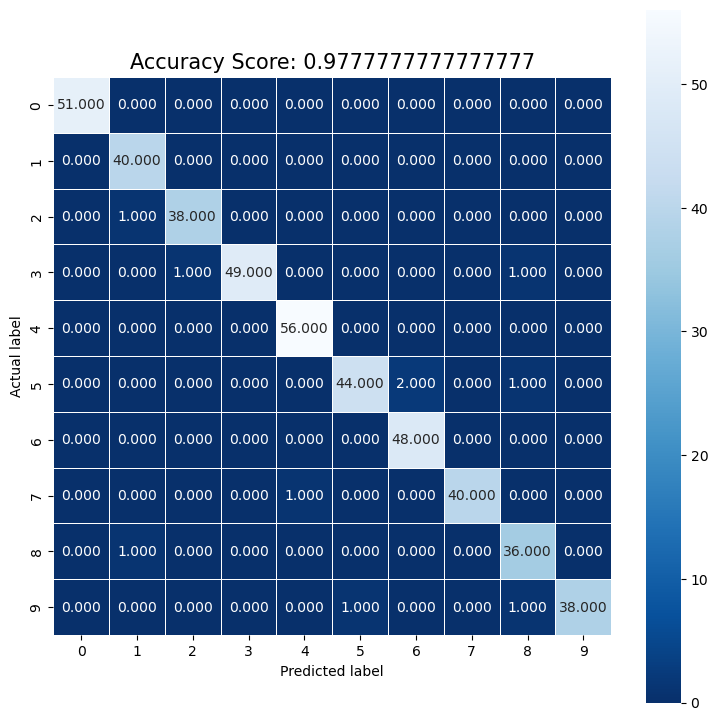

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_pred, y_test))
plt.title(all_sample_title, size = 15);

# 6. Regularização

A regressão linear funciona selecionando coeficientes para cada variável independente que minimiza uma função de perda.<br>
No entanto, se os coeficientes forem muito grandes, isso pode levar ao ajuste excessivo do modelo no conjunto de dados de treino. Tal modelo não generalizará bem para dados que ainda não viu. <br><br>
Para superar esta problema, fazemos regularizações que penalizam grandes coeficientes. 

## 6.1 Regularização com Ridge Regression

### 6.1.1 Exemplo de Ridge Regression usando os datasets do Scikit

In [41]:
#Importa desta feita os datasets
from sklearn import datasets

#Load dataset de diabetes
diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y = True , as_frame = True)

In [42]:
# Colunas que temos nos dados
diabetes_X.keys

<bound method NDFrame.keys of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.00

In [43]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [44]:
# print data(feature)shape
diabetes_X.shape

(442, 10)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3,random_state=2510) 

In [46]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
24,-0.063635,-0.044642,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025953,-0.054925
241,0.030811,0.050680,-0.008362,0.004658,0.014942,0.027496,0.008142,-0.008127,-0.029526,0.056912
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
138,0.034443,0.050680,0.111276,0.076958,-0.031840,-0.033881,-0.021311,-0.002592,0.028020,0.073480
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072133,0.011349
...,...,...,...,...,...,...,...,...,...,...
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343
163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023647,0.061054
328,-0.038207,-0.044642,0.067085,-0.060756,-0.029088,-0.023234,-0.010266,-0.002592,-0.001496,0.019633
333,0.027178,0.050680,-0.006206,0.028758,-0.016704,-0.001627,-0.058127,0.034309,0.029297,0.032059


A regressão Ridge é uma extensão da regressão linear onde a função de perda (loss) é modificada para minimizar a complexidade do modelo. Essa modificação é feita adicionando um parâmetro de penalização (penalty) equivalente ao quadrado da magnitude dos coeficientes.

**Função de perda = OLS + alfa * somatório (valores de coeficientes quadrados)**<br><br>

Na função de perda acima, alfa é o parâmetro que precisamos selecionar. Um valor alfa baixo pode levar a um ajuste excessivo, enquanto um valor alfa alto pode levar a um ajuste insuficiente. <br>

In [47]:
from sklearn.linear_model import Ridge

# instancia o modelo de regressão Ridge
# com um valor alfa 
model_ridge = Ridge(alpha=0.01)

In [48]:
model_ridge.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [49]:
y_pred_ridgetrain= model_ridge.predict(X_train)

In [50]:
y_pred_ridgetest = model_ridge.predict(X_test)

In [51]:
y_pred_ridgetest[0:3]

array([158.83215558, 121.16021195, 187.58510908])

In [52]:
y_test[0:3]

24     184.0
241    177.0
121    173.0
Name: target, dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE nos dados de Treino: {}' .format(np.sqrt(mean_squared_error(y_train,y_pred_ridgetrain))))
print('R2 nos dados de Treino: {}' .format(r2_score(y_train, y_pred_ridgetrain)))

print('MSE nos dados de Teste: {}' .format(np.sqrt(mean_squared_error(y_test,y_pred_ridgetest)))) 
print('R2 nos dados de Teste: {}' .format(r2_score(y_test, y_pred_ridgetest)))

MSE nos dados de Treino: 53.83174171338626
R2 nos dados de Treino: 0.5019381528297013
MSE nos dados de Teste: 54.68294795042934
R2 nos dados de Teste: 0.5032327253095995


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


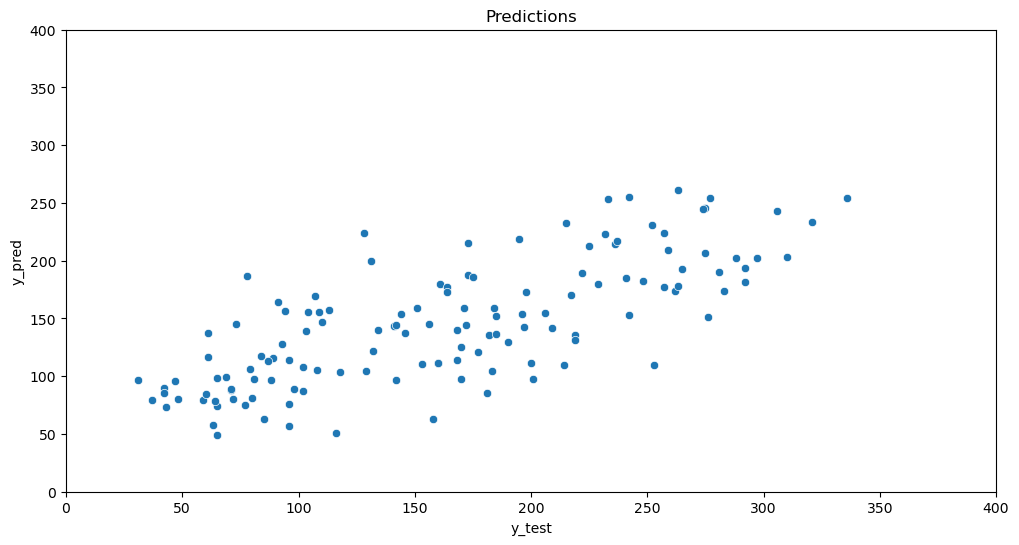

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred_ridgetest)
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 6.1.2 Exemplo de Ridge Regression a partir do ficheiro de Hitters

In [55]:
%pwd

'C:\\Users\\sonia.quaresma\\PythonPlayground'

In [59]:
datadir ="datasets\\"
filename = "Hitters.csv"

In [60]:
df = pd.read_csv(f"{datadir}{filename}", index_col=0, verbose = False, encoding='latin-1')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [61]:
df.reset_index()

,index,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [62]:
# Vamos descobrir em que colunas há valores em falta
[col for col in df.columns if df[col].isnull().sum()>0]

['Salary']

In [63]:
# só a coluna salary tem valores em falta
df.dropna(inplace = True)

In [64]:
# vamos ver que colunas são do tipo Object
qual_vars = [col for col in df.columns if df[col].dtype == 'O']
print(qual_vars)

['League', 'Division', 'NewLeague']


In [65]:
# e criar variáveis dummy para as nossas variáveis categóricas
df = pd.get_dummies(df,columns= qual_vars,drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False


In [66]:
# Separamos a coluna target das outras
X = df.drop('Salary',axis = 1)
y = df['Salary']

In [67]:
from sklearn.preprocessing import StandardScaler

# Como vemos nas colunas grandes diferenças de escala vamos standardizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2510) 
print(X_train.shape)
print(y_test.shape)

(184, 19)
(79,)


In [69]:
from sklearn.linear_model import Ridge

# instancia o modelo de regressão Ridge
# com um valor alfa 
model_ridge = Ridge(alpha=0.01)

In [70]:
model_ridge.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [71]:
y_pred_ridgetrain= model_ridge.predict(X_train)

In [72]:
y_pred_ridgetest= model_ridge.predict(X_test)

In [73]:
y_pred_ridgetest[0:3]

array([1030.2147218 ,  683.12047816,  106.59809422])

In [74]:
y_test[0:3]

-Frank White        750.0
-Marty Barrett      575.0
-Argenis Salazar    100.0
Name: Salary, dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE nos dados de Treino: {}' .format(np.sqrt(mean_squared_error(y_train,y_pred_ridgetrain))))
print('R2 nos dados de Treino: {}' .format(r2_score(y_train, y_pred_ridgetrain)))

print('MSE nos dados de Teste: {}' .format(np.sqrt(mean_squared_error(y_test,y_pred_ridgetest)))) 
print('R2 nos dados de Teste: {}' .format(r2_score(y_test, y_pred_ridgetest)))

MSE nos dados de Treino: 300.4690694448532
R2 nos dados de Treino: 0.5539698178486954
MSE nos dados de Teste: 344.0400244671796
R2 nos dados de Teste: 0.4164667980776514


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


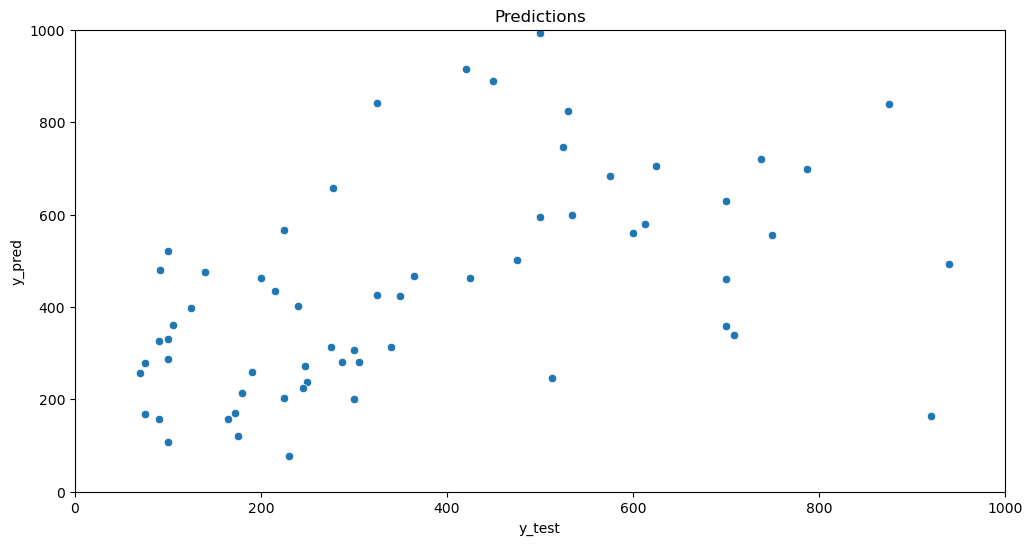

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred_ridgetest)
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 6.1.3 Explorar o alpha

In [77]:
list_alpha = 10**np.linspace(-2,10,100)
list_alpha

array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,
       3.05385551e-02, 4.03701726e-02, 5.33669923e-02, 7.05480231e-02,
       9.32603347e-02, 1.23284674e-01, 1.62975083e-01, 2.15443469e-01,
       2.84803587e-01, 3.76493581e-01, 4.97702356e-01, 6.57933225e-01,
       8.69749003e-01, 1.14975700e+00, 1.51991108e+00, 2.00923300e+00,
       2.65608778e+00, 3.51119173e+00, 4.64158883e+00, 6.13590727e+00,
       8.11130831e+00, 1.07226722e+01, 1.41747416e+01, 1.87381742e+01,
       2.47707636e+01, 3.27454916e+01, 4.32876128e+01, 5.72236766e+01,
       7.56463328e+01, 1.00000000e+02, 1.32194115e+02, 1.74752840e+02,
       2.31012970e+02, 3.05385551e+02, 4.03701726e+02, 5.33669923e+02,
       7.05480231e+02, 9.32603347e+02, 1.23284674e+03, 1.62975083e+03,
       2.15443469e+03, 2.84803587e+03, 3.76493581e+03, 4.97702356e+03,
       6.57933225e+03, 8.69749003e+03, 1.14975700e+04, 1.51991108e+04,
       2.00923300e+04, 2.65608778e+04, 3.51119173e+04, 4.64158883e+04,
      

In [78]:
coeff_matrix = {}

for alpha in list_alpha:
    model = Ridge(alpha=alpha)
    model.fit(X,y)
    coeff_matrix[alpha] = list(model.coef_)

In [79]:
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1.000000e-02,-290.918728,337.229910,37.495419,-60.017790,-26.665375,134.928045,-17.051824,-388.777849,88.580588,-12.898994,477.601029,258.387712,-213.378990,78.761482,5.365672e+01,-2.219265e+01,3.125460e+01,-58.443824,-1.238497e+01
1.321941e-02,-290.862746,337.039648,37.381713,-59.842092,-26.560787,134.881689,-17.166596,-388.046721,89.164057,-12.494991,476.606154,257.661560,-213.216987,78.761568,5.363224e+01,-2.220266e+01,3.125631e+01,-58.453308,-1.239630e+01
1.747528e-02,-290.789150,336.790313,37.232619,-59.611894,-26.423634,134.820836,-17.317830,-387.078202,89.916997,-11.967363,475.303911,256.712435,-213.005133,78.761698,5.359983e+01,-2.221573e+01,3.125844e+01,-58.465774,-1.241105e+01
2.310130e-02,-290.692507,336.464367,37.037600,-59.311089,-26.244216,134.741106,-17.516885,-385.794898,90.881489,-11.280807,473.604369,255.476124,-212.728953,78.761896,5.355691e+01,-2.223273e+01,3.126106e+01,-58.482132,-1.243018e+01
3.053856e-02,-290.565733,336.039547,36.783312,-58.919331,-26.010245,134.636895,-17.778470,-384.094384,92.105310,-10.391640,471.394628,253.872789,-212.370325,78.762198,5.350006e+01,-2.225474e+01,3.126419e+01,-58.503548,-1.245482e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.274549e+09,0.000014,0.000016,0.000012,0.000015,0.000016,0.000016,0.000014,0.000019,0.000020,0.000019,0.000020,0.000021,0.000018,0.000011,9.198538e-07,-1.953073e-07,-5.164761e-07,-0.000007,-1.025022e-07
4.328761e+09,0.000011,0.000012,0.000009,0.000011,0.000012,0.000012,0.000011,0.000014,0.000015,0.000014,0.000015,0.000016,0.000013,0.000008,6.958357e-07,-1.477427e-07,-3.906955e-07,-0.000005,-7.753936e-08
5.722368e+09,0.000008,0.000009,0.000007,0.000009,0.000009,0.000009,0.000008,0.000011,0.000011,0.000011,0.000012,0.000012,0.000010,0.000006,5.263742e-07,-1.117620e-07,-2.955470e-07,-0.000004,-5.865581e-08
7.564633e+09,0.000006,0.000007,0.000005,0.000007,0.000007,0.000007,0.000006,0.000008,0.000009,0.000008,0.000009,0.000009,0.000008,0.000005,3.981828e-07,-8.454381e-08,-2.235706e-07,-0.000003,-4.437104e-08


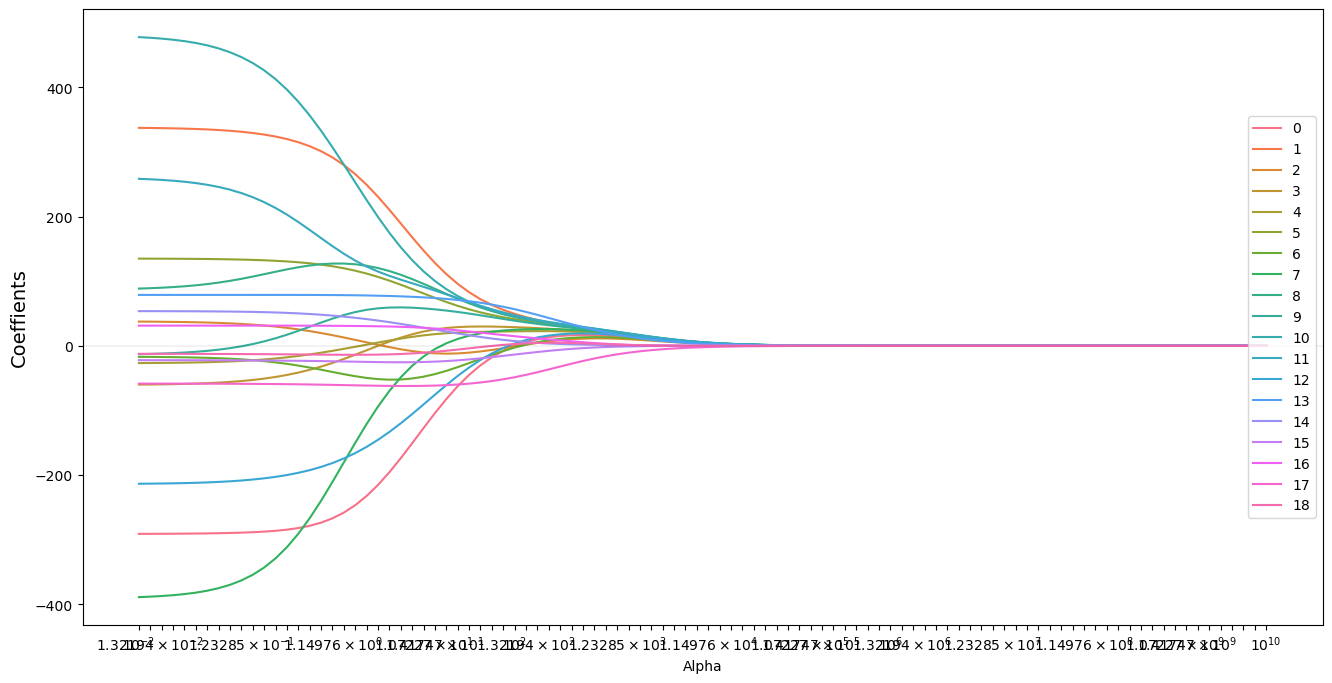

In [81]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [82]:
print(list_alpha[0])
print(list_alpha[3])
print(list_alpha[97])
print(list_alpha[99])

0.01
0.023101297000831605
5722367659.35022
10000000000.0


In [83]:
# para um valor baixo de alpha os coeficientes são elevados
print(coeff_matrix[list_alpha[8]])

[-289.5186532702005, 332.67911842338134, 34.779441936712615, -55.84478229632183, -24.166567449871728, 133.80205477153615, -19.909741728267722, -369.74268750181517, 100.54237339904844, -3.614039922917079, 454.2056856599545, 241.5721434373845, -209.588450498816, 78.76557723285971, 53.019463960959904, -22.423285078782285, 31.278539444238827, -58.675558692721786, -12.638577929630834]


In [84]:
# para um valor elevado de alpha os coeficientes são próximos de zero
# mas não realmente zero
print(coeff_matrix[list_alpha[90]])

[5.7633182487043e-05, 6.40427770922997e-05, 5.0079153502888385e-05, 6.129576852892078e-05, 6.561689194262844e-05, 6.480083916119167e-05, 5.8492473598104725e-05, 7.681124525639192e-05, 8.013609785207736e-05, 7.663536669557499e-05, 8.214613025072632e-05, 8.277213810215089e-05, 7.150981326993899e-05, 4.386760495701928e-05, 3.713461226222583e-06, -7.884609239667481e-07, -2.0850022653353327e-06, -2.810549748199537e-05, -4.1378878558150076e-07]


In [85]:
# linalg.norm(x, ord=None, axis=None, keepdims=False)
# Calcula a norma matricial ou vetorial, dependendo do ord, 8 normas diferentes
# Quando ord é None para um vector x retorna a 2-norm

list_l2_norm = []

for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))

In [86]:
print(list_l2_norm[0])
print(list_l2_norm[-1])

858.051663440268
2.0720439677307483e-05


(0.0, 100.0)

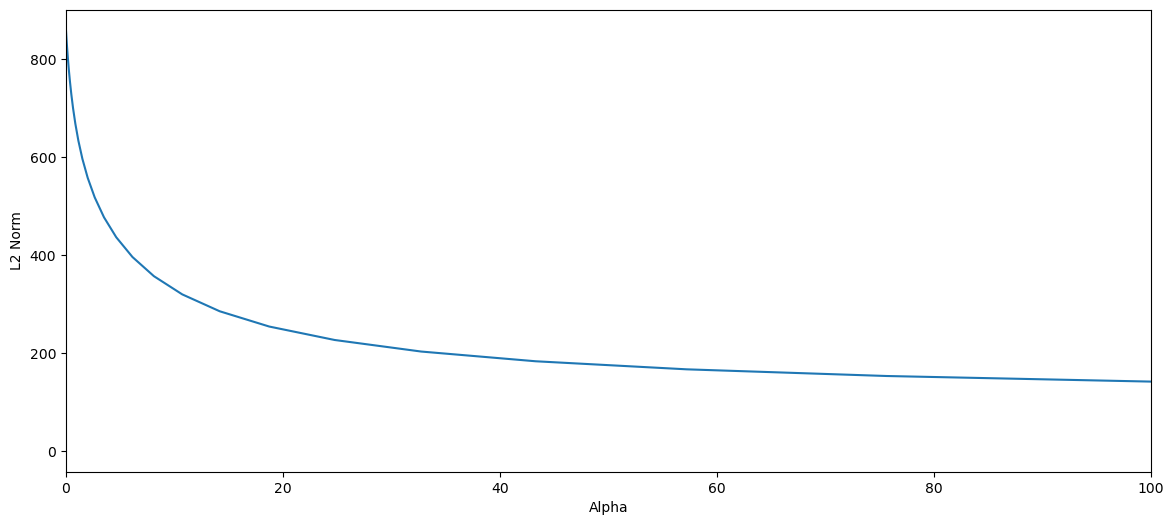

In [87]:
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,100)

### 6.1.4 Seleccionar o melhor Alpha

In [88]:
# Usando o método de validação
X_train,X_test,y_train,y_test = train_test_split(df.drop('Salary',axis = 1),df['Salary'],test_size = 0.7,random_state = 2023)

In [89]:
validation_score = []
for alpha in list_alpha:
    model = Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    validation_score.append(mean_squared_error(model.predict(X_test),y_test)*len(y_test))

In [90]:
validation_score[:5]

[31052293.077772092,
 31048134.7338186,
 31042671.000255834,
 31035506.016067047,
 31026134.030731667]

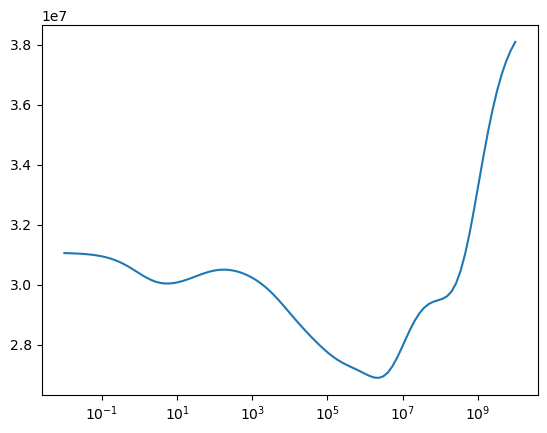

In [91]:
# visualização dos scores
sns.lineplot(x=list_alpha,y=validation_score)
plt.xscale('log')

In [92]:
np.argmin(validation_score)

69

In [93]:
validation_score[69]

26893773.159507208

In [94]:
model_ridge = Ridge(alpha=validation_score[69])
model_ridge.fit(X_train, y_train) 
y_pred_ridgetrain= model_ridge.predict(X_train)
y_pred_ridgetest= model_ridge.predict(X_test)
y_pred_ridgetest[0:3]

array([339.77849797, 601.88005904, 894.71461937])

In [95]:
# reparem que como estamos a partir/split com seed diferente 
# temos diferentes elementos no conjunto de teste
y_test[0:3]

-Ron Roenicke       191.000
-Keith Moreland    1043.333
-Phil Garner        450.000
Name: Salary, dtype: float64

## 6.2 Regularização com Lasso

Lasso regression,ou Least Absolute Shrinkage and Selection Operator, é também uma modificação da regressão linear. No Lasso, a função de perda (loss) é modificada para minimizar a complexidade do modelo, limitando a soma dos valores absolutos dos coeficientes do modelo (também chamada de norma l1).


**Função perda = OLS + alfa * somatório (valores absolutos da magnitude dos coeficientes)**

Na função de perda acima, alfa é o parâmetro de penalização que precisamos selecionar. O uso de uma restrição de norma l1 força alguns coeficientes a assumir o valor zero para permitir que outros coeficientes assumam valores diferentes de zero.

No scikit-learn, um modelo de regressão *LASSO* é construído usando a classe Lasso.

### 6.2.1 Exemplo de Regularização usando Datasets do Scikit

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3,random_state=2510) 

In [97]:
from sklearn.linear_model import Lasso

# instancia o modelo de regressão Lasso
# com um valor alfa 
model_lasso = Lasso(alpha=0.01)

In [98]:
model_lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [99]:
y_pred_lassotrain = model_lasso.predict(X_train)

In [100]:
y_pred_lassotest = model_lasso.predict(X_test)

In [101]:
y_pred_lassotest[:5]

array([158.94237435, 120.834578  , 187.363952  , 254.68025769,
        88.9552664 ])

In [102]:
y_test[:5]

24     184.0
241    177.0
121    173.0
138    336.0
90      98.0
Name: target, dtype: float64

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE nos dados de Treino: {}' .format(np.sqrt(mean_squared_error(y_train,y_pred_lassotrain))))
print('R2 nos dados de Treino: {}' .format(r2_score(y_train, y_pred_lassotrain)))

print('MSE nos dados de Teste: {}' .format(np.sqrt(mean_squared_error(y_test,y_pred_lassotest)))) 
print('R2 nos dados de Teste: {}' .format(r2_score(y_test, y_pred_lassotest)))

MSE nos dados de Treino: 53.834764417795725
R2 nos dados de Treino: 0.5018822179496036
MSE nos dados de Teste: 54.71440186020355
R2 nos dados de Teste: 0.5026610748228949


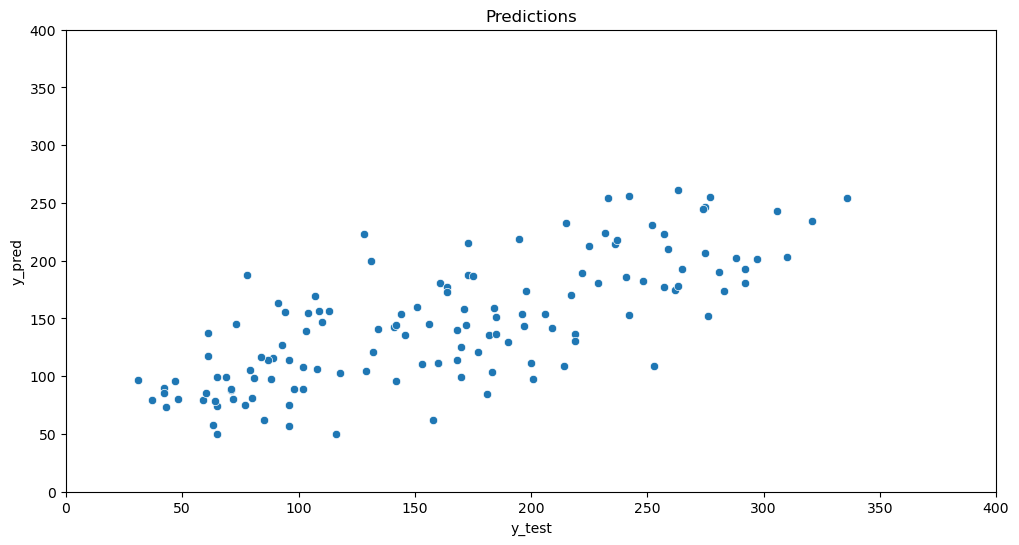

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred_lassotest)
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 6.2.2 Exemplo de Exploração do Alpha

In [105]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False


In [106]:
# Separamos a coluna target das outras
X = df.drop('Salary',axis = 1)
y = df['Salary']

In [107]:
from sklearn.preprocessing import StandardScaler

# Como vemos nas colunas grandes diferenças de escala vamos standardizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2510) 
print(X_train.shape)
print(y_test.shape)

(210, 19)
(53,)


In [109]:
coeff_matrix_lasso = {}

for alpha in list_alpha:
    model = Lasso(alpha=alpha)
    model.fit(X,y)
    coeff_matrix_lasso[alpha] = list(model.coef_)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.182e+06, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.172e+06, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.794e+06, tolerance: 5.332e+03
  model = cd_fast.enet_

In [110]:
tmp = pd.DataFrame(coeff_matrix_lasso).T
tmp.index = list_alpha
tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0.010000,-286.905007,331.363096,36.212359,-57.357808,-25.658648,133.787447,-14.313048,-422.215279,133.673334,-4.578178,464.460502,246.073678,-208.802960,78.639945,54.350452,-22.467425,31.583507,-58.365877,-12.672573
0.013219,-286.950122,331.325695,36.091031,-57.257930,-25.528647,133.747959,-14.398744,-420.990800,132.935083,-4.435307,464.206011,245.764342,-208.778380,78.644615,54.304079,-22.452758,31.554027,-58.363511,-12.643337
0.017475,-287.009869,331.275922,35.930298,-57.125588,-25.356432,133.695761,-14.512163,-419.372611,131.963418,-4.244520,463.867405,245.352140,-208.745736,78.650806,54.242814,-22.433398,31.515092,-58.360387,-12.604741
0.023101,-287.089063,331.210178,35.717682,-56.950581,-25.128615,133.626802,-14.662262,-417.232465,130.679408,-3.991625,463.419197,244.805989,-208.702686,78.659004,54.161818,-22.407810,31.463628,-58.356260,-12.553732
0.030539,-287.193575,331.122512,35.436185,-56.718727,-24.827025,133.535567,-14.860641,-414.406159,128.989613,-3.654757,462.823461,244.079779,-208.645293,78.669850,54.054836,-22.374038,31.395662,-58.350806,-12.486383


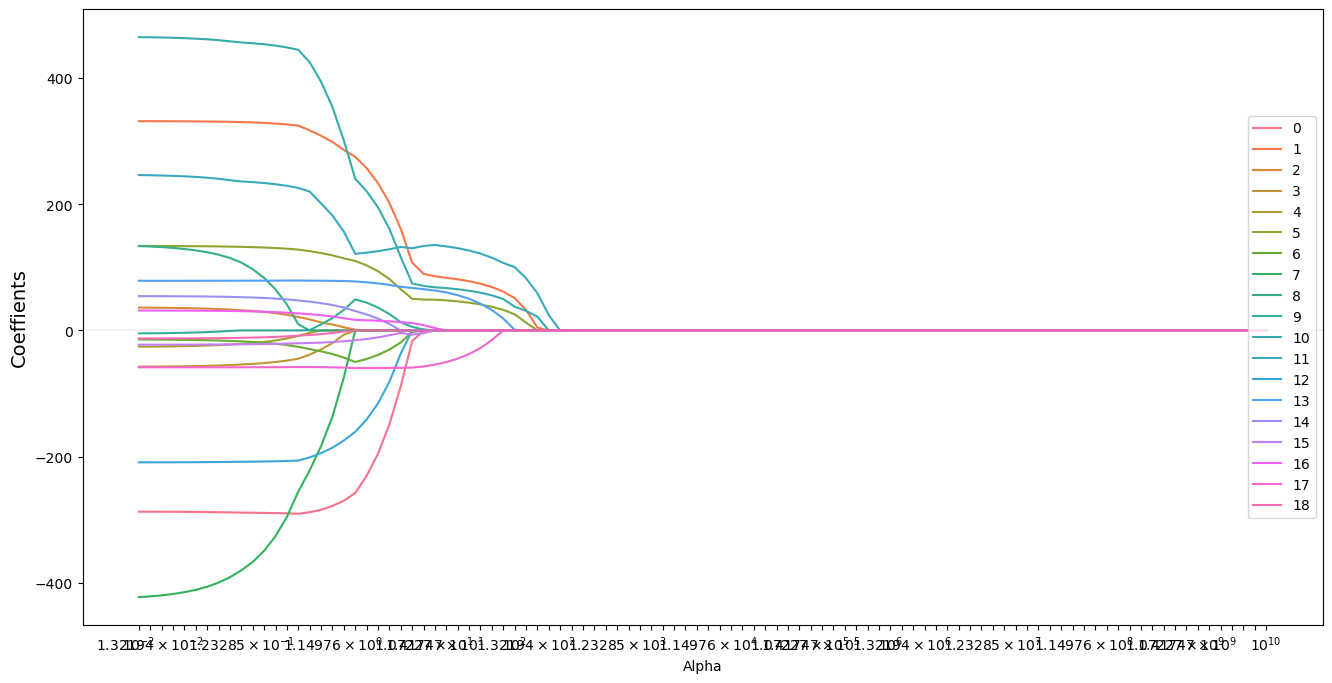

In [111]:
# Visualização dos Coeficientes usando Lasso
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [112]:
# para valores pequenos de alpha os coeficientes são grandes
print(coeff_matrix_lasso[list_alpha[8]])

[-288.06252906937215, 330.3698119988711, 33.06222643992295, -54.759037031180114, -22.28462955849052, 132.76311903093188, -16.525200498348894, -390.6592305572671, 114.82688141722605, -0.8084173075286021, 457.7814835607475, 237.95136546687922, -208.1498760652225, 78.76080852606057, 53.15428784246432, -22.089840987640912, 30.823239242661025, -58.30463802012504, -11.918959657361917]


In [113]:
# para valores maiores de alpha alguns coeficientes são zero
print(coeff_matrix_lasso[list_alpha[30]])

[0.0, 74.03594663563692, 0.0, 0.0, 0.0, 41.19913426013348, 0.0, 0.0, 0.0, 0.0, 59.78901166959316, 121.68559725914021, 0.0, 42.40642835425778, 0.0, -0.0, 0.0, -27.73480891199421, 0.0]


In [114]:
# para valores suficientemente grandes de alpha
# são todos encolhidos até ao zero 
# ao contrário do que sucedia com o Ridge em que se
# aproximavam mas nunca eram mesmo zero
print(coeff_matrix[list_alpha[90]])

[5.7633182487043e-05, 6.40427770922997e-05, 5.0079153502888385e-05, 6.129576852892078e-05, 6.561689194262844e-05, 6.480083916119167e-05, 5.8492473598104725e-05, 7.681124525639192e-05, 8.013609785207736e-05, 7.663536669557499e-05, 8.214613025072632e-05, 8.277213810215089e-05, 7.150981326993899e-05, 4.386760495701928e-05, 3.713461226222583e-06, -7.884609239667481e-07, -2.0850022653353327e-06, -2.810549748199537e-05, -4.1378878558150076e-07]


## 6.3 Regularização usando ElasticNet Regression

ElasticNet combina as propriedades da regressão Ridge e Lasso. Funciona penalizando o modelo usando a norma l2 e a norma l1.

No scikit-learn, um modelo de regressão ElasticNet é construído usando a classe ElasticNet.

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3,random_state=2510) 

In [116]:
from sklearn.linear_model import ElasticNet

# instancia o modelo de regressão ElasticNet
# com um valor alfa 
model_elnet = ElasticNet(alpha = 0.01)

In [117]:
model_elnet.fit(X_train, y_train) 

ElasticNet(alpha=0.01)

In [118]:
y_pred_elnettrain= model_elnet.predict(X_train)

In [119]:
y_pred_elnettest= model_elnet.predict(X_test)
y_pred_elnettest[:5]

array([140.35874213, 144.42566346, 169.09220213, 195.456184  ,
       111.12064756])

In [120]:
y_test[:5]

24     184.0
241    177.0
121    173.0
138    336.0
90      98.0
Name: target, dtype: float64

In [121]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE nos dados de Treino: {}' .format(np.sqrt(mean_squared_error(y_train,y_pred_elnettrain))))
print('R2 nos dados de Treino: {}' .format(r2_score(y_train, y_pred_elnettrain)))

print('MSE nos dados de Teste: {}' .format(np.sqrt(mean_squared_error(y_test,y_pred_elnettest)))) 
print('R2 nos dados de Teste: {}' .format(r2_score(y_test, y_pred_elnettest)))

MSE nos dados de Treino: 60.662341933166346
R2 nos dados de Treino: 0.36752297059357386
MSE nos dados de Teste: 62.49579343732485
R2 nos dados de Teste: 0.3511404335037811


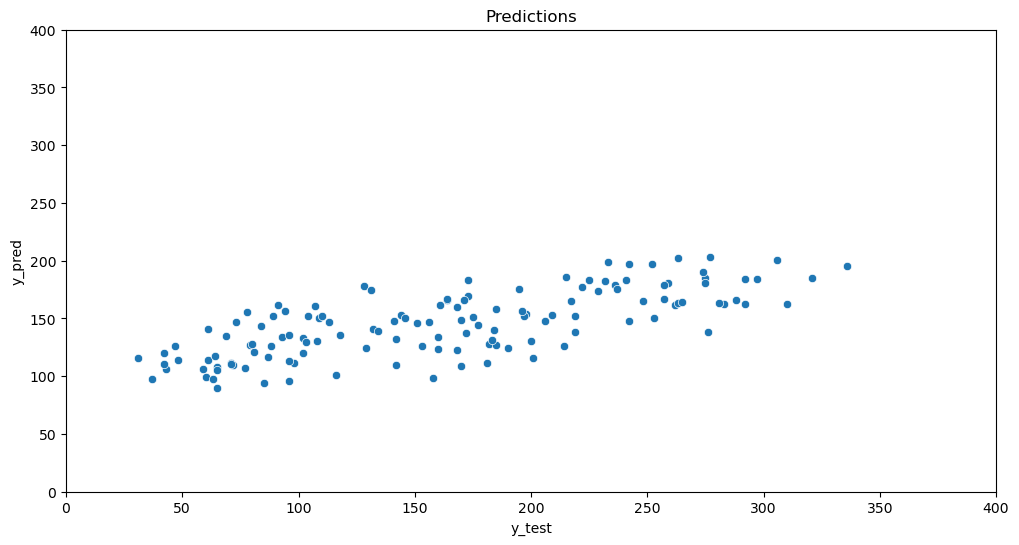

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred_elnettest)
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()